<a href="https://colab.research.google.com/github/harshitha-0531/Customer_persona/blob/main/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import all libraies plotly scipy .cluter.nirecahcy and skelarn .custer amnd preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

In [5]:
!git clone https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset.git


Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.55 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
df= pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')
display(df.head(5))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
!ls -R "/content/"

/content/:
21-Days-21-Projects-Dataset  sample_data

/content/21-Days-21-Projects-Dataset:
Datasets

/content/21-Days-21-Projects-Dataset/Datasets:
airline_passenger_timeseries.csv  reviews.csv
Mall_Customers.csv		  Titanic-Dataset.csv
netflix_titles.csv		  WA_Fn-UseC_-Telco-Customer-Churn.csv
readme.txt

/content/sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [8]:
df.info()
# df.drop()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df.drop('CustomerID',axis=1,inplace=True)
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


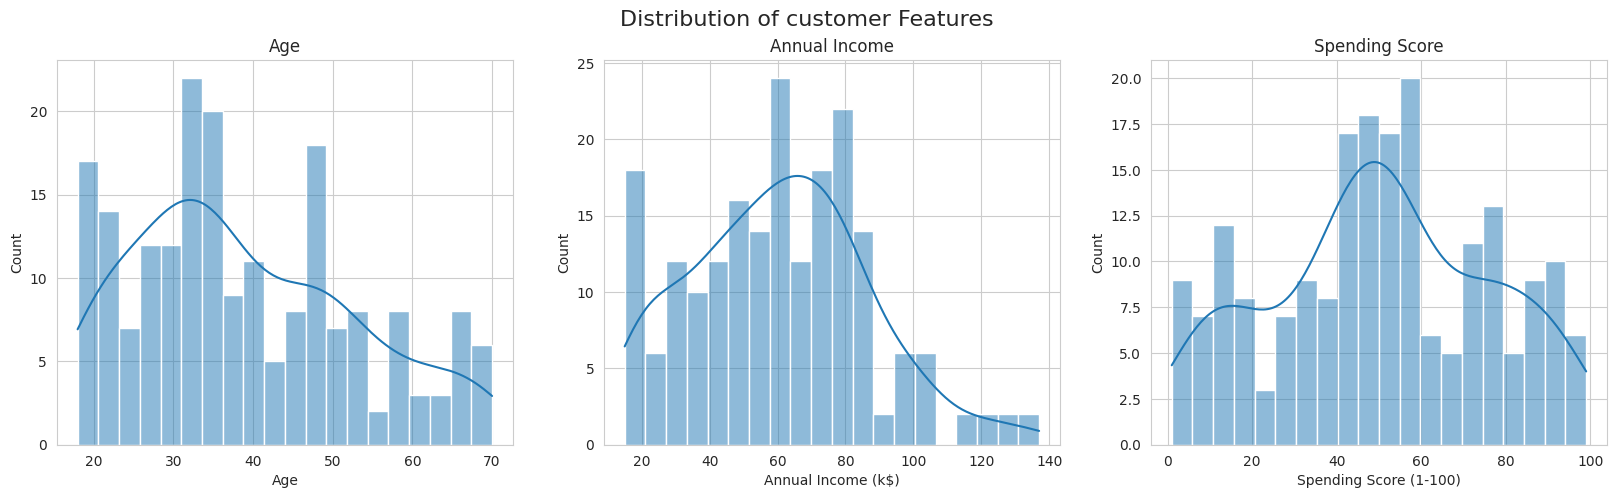

In [13]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Distribution of customer Features', fontsize=16)
sns.histplot(df['Age'],ax=axes[0],bins=20,kde=True).set_title('Age')
sns.histplot(df['Annual Income (k$)'],ax=axes[1],bins=20,kde=True).set_title('Annual Income')
sns.histplot(df['Spending Score (1-100)'],ax=axes[2],bins=20,kde=True).set_title('Spending Score')
plt.show()

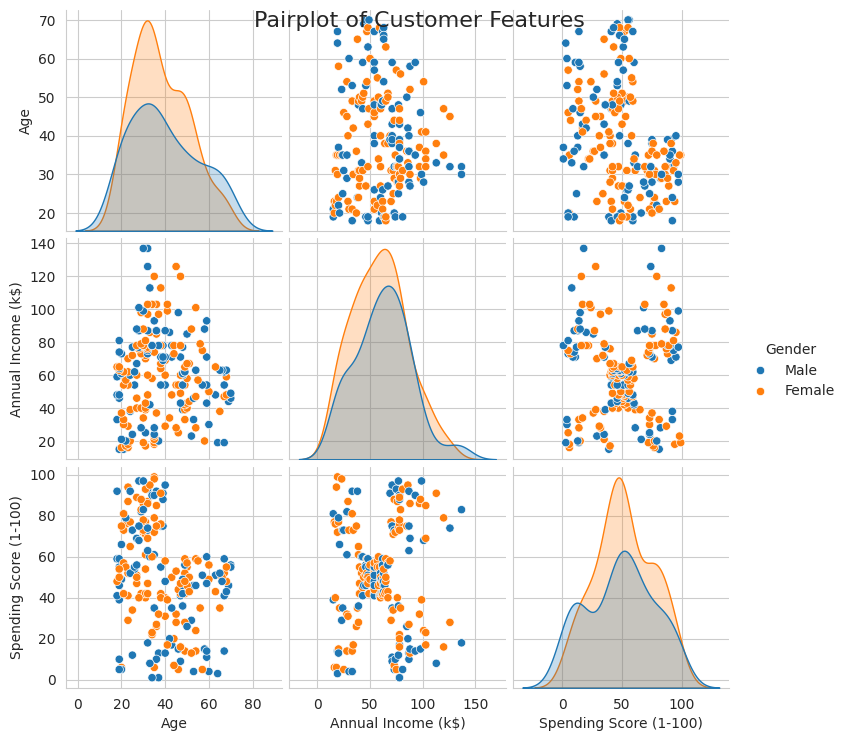

In [14]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)','Spending Score (1-100)'],hue='Gender')
plt.suptitle('Pairplot of Customer Features', fontsize=16)
plt.show()

In [15]:
# bivariate analysis for anual income and spending score use sns
import plotly.express as px
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", color="Gender")
fig.show()


In [16]:
fig=px.scatter_3d(df, x='Annual Income (k$)',
                  y='Spending Score (1-100)',
                  z='Age',
                  color='Gender',
                  title='3D view of customer Data')
fig.show()

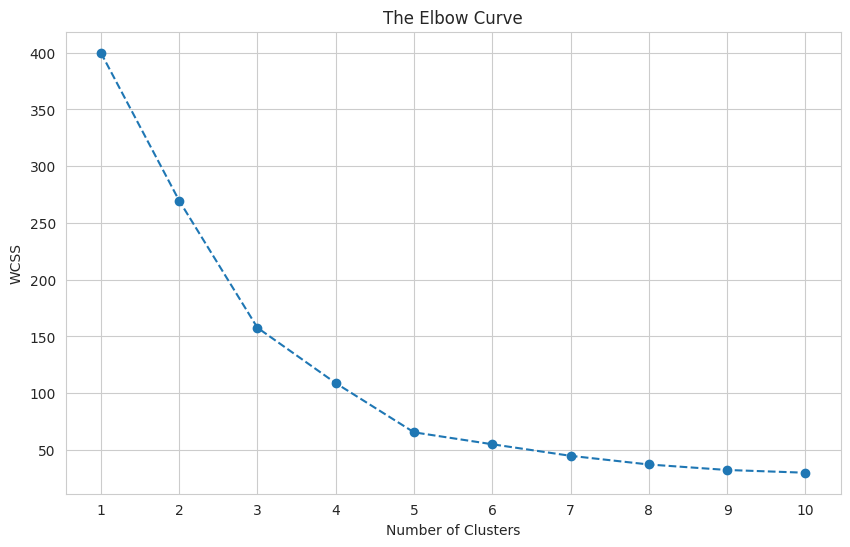

In [17]:
# slect and scle features
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X1=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1=StandardScaler()
X1_scaled=scaler1.fit_transform(X1)

wcss1=[]
for k in range(1,11):
  kmeans =KMeans(n_clusters=k, init='k-means++',random_state=42, n_init=10)
  kmeans.fit(X1_scaled)
  wcss1.append(kmeans.inertia_)
  # plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss1, marker='o',linestyle='--'  )
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))

plt.show()

In [18]:
# build fir an d final model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Income_Cluster']=kmeans.fit_predict(X1_scaled)

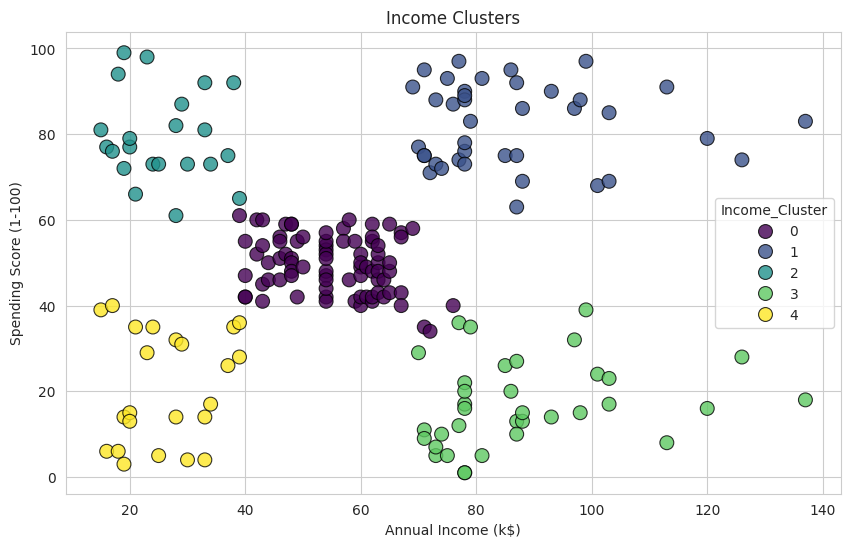

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Income_Cluster',
                  palette='viridis', s=100,alpha=0.8,edgecolor='black' ,data=df)
plt.title('Income Clusters')
plt.show()

In [21]:
cluster_profiles1= df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size']=df['Income_Cluster'].value_counts()

print(cluster_profiles1)


                  Age  Annual Income (k$)  Spending Score (1-100)  Size
Income_Cluster                                                         
0               42.72               55.30                   49.52    81
1               32.69               86.54                   82.13    39
2               25.27               25.73                   79.36    22
3               41.11               88.20                   17.11    35
4               45.22               26.30                   20.91    23


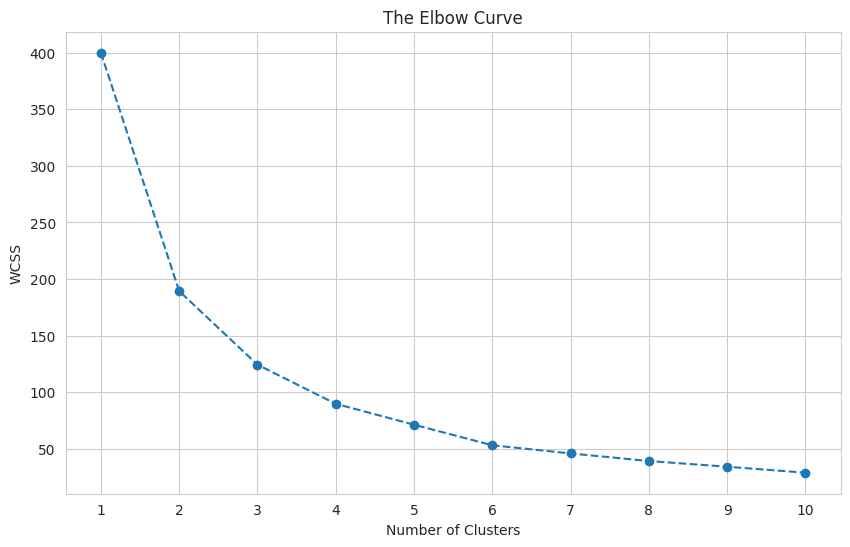

In [24]:

X2=df[['Age','Spending Score (1-100)']]
scaler2=StandardScaler()
X2_scaled=scaler2.fit_transform(X2)
wcss2=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init='k-means++',random_state=42,n_init=10)
  kmeans.fit(X2_scaled)
  wcss2.append(kmeans.inertia_)
# plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss2, marker='o',linestyle='--')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

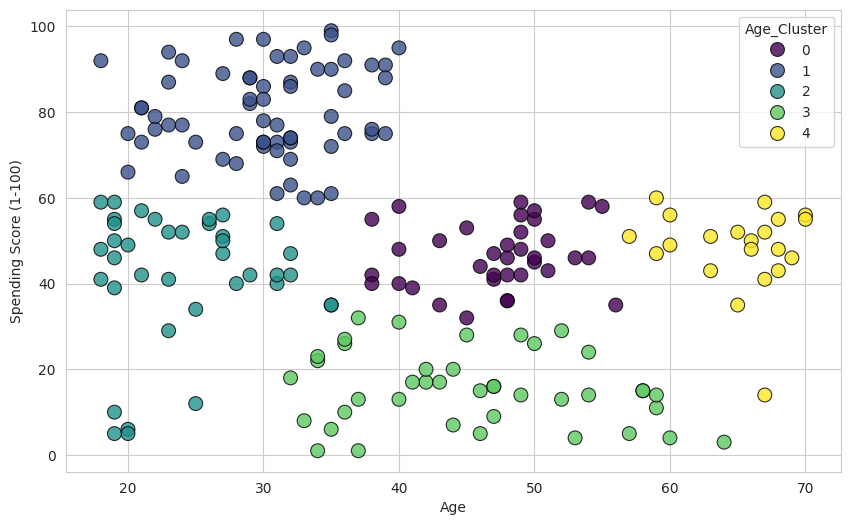

In [25]:
# build and fit final model fro age segmentation
kmeans2=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Age_Cluster']=kmeans2.fit_predict(X2_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Age_Cluster',
               palette='viridis',s=100,alpha=0.8,edgecolor='black',data=df)

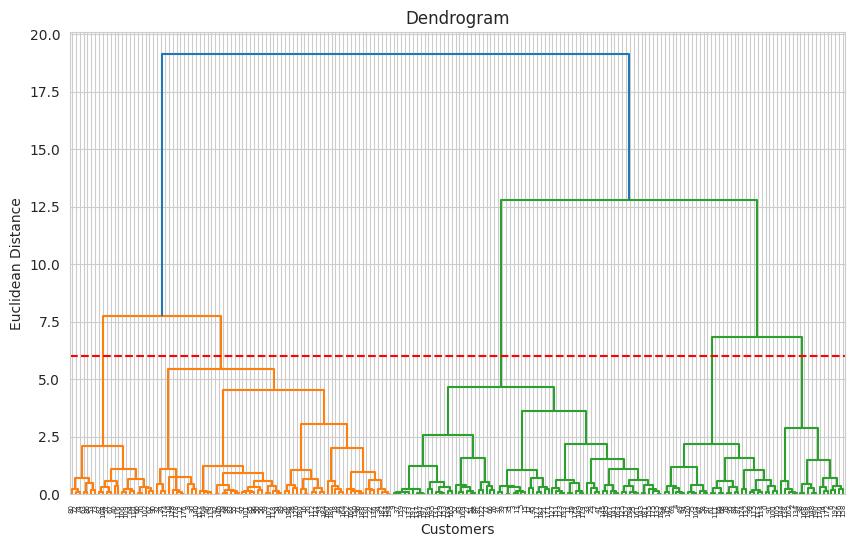

In [27]:
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(X2_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y=6,color='r',linestyle='--')
plt.show()